# Mercedes-Benz Greener Manufacturing

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

Link: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# Importing Dataset

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

# Data Overview

# Train Dataset

In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(4209, 378)

In [ ]:
test.shape

(4209, 377)

In [ ]:
submission.shape

(4209, 2)

There are 4209 data points in training dataset and 378 features. 

Out of 378 features, 1 is dependent feature which is y and remaining 377 features are independent features

In [ ]:
train.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
X3       object
X4       object
X5       object
X6       object
X8       object
X10       int64
X11       int64
X12       int64
X13       int64
X14       int64
X15       int64
X16       int64
X17       int64
X18       int64
X19       int64
X20       int64
X21       int64
X22       int64
X23       int64
X24       int64
X26       int64
X27       int64
X28       int64
X29       int64
X30       int64
X31       int64
X32       int64
X33       int64
X34       int64
X35       int64
X36       int64
X37       int64
X38       int64
X39       int64
X40       int64
X41       int64
X42       int64
X43       int64
X44       int64
X45       int64
X46       int64
X47       int64
X48       int64
X49       int64
X50       int64
X51       int64
X52       int64
X53       int64
X54       int64
X55       int64
X56       int64
X57       int64
X58       int64
X59       int64
X60       int64
X61       int64
X62       int64
X63     

There is one feature which is of float64 ,that is 'y'

There are 9 categorical features of data type object. Those features are from X0 to X8

There are 368 features whch are of int64. Those features are ID, X10 to X385. These all integer features are binary features containing 0 and 1

# Exploratory Data Analysis

# Missing Values

In [ ]:
train.isnull().sum().sum()

0

There are no Missing Values in training dataset

In [ ]:
test.isnull().sum().sum()

0

There are no Missing Values in test dataset

**Checking Duplicate Values**

In [ ]:
train.duplicated().sum()

0

No duplicate rows

# Target Variable or Dependent Feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution plot of target variable')

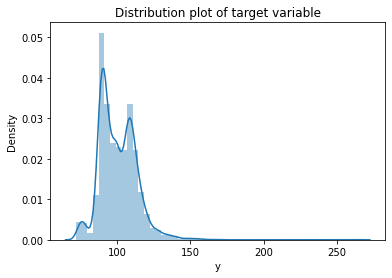

In [ ]:
#Distribution plot of target variable
sns.distplot(train['y'])
plt.title('Distribution plot of target variable')

From the plot we can conclude that most of the target values lies in range from 75 to 150.

Above distribution is skewed.

In [ ]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

1. There is slight difference between mean and 50th percentile indicating that there might be few outliers
2. Maximum value is more than twice of 75th percentil value and mean , indicating that max value can be outlier

Text(0, 0.5, 'probability')

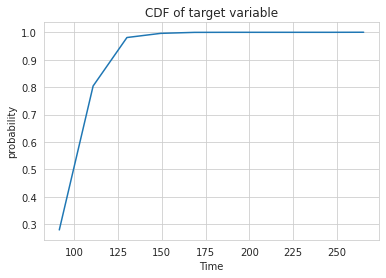

In [ ]:
#Plotting CDF of target variable 'time'
sns.set_style("whitegrid")
count,bin_edges=np.histogram(train['y'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf)
plt.title("CDF of target variable")
plt.xlabel("Time")
plt.ylabel('probability')

Approximately 95% of cars have testing time less than 125 seconds.

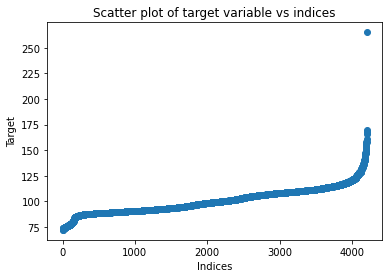

In [ ]:
#Plotting scatter plot of time with respect to indices
sort_target=list(train['y']) #Creating a list to store target variable
sort_target=sorted(sort_target,reverse=False) #sorting target variable 
plt.scatter(range(train.shape[0]),sort_target)
plt.title('Scatter plot of target variable vs indices')
plt.xlabel('Indices')
plt.ylabel('Target')
plt.show()

From above plot we can see an outlier in target variable, whose value could be greater than 250

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


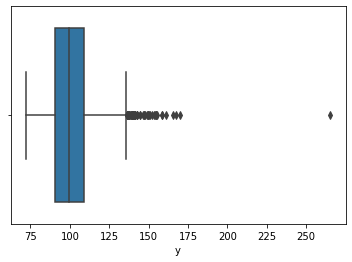

In [ ]:
#Visualization of percentiles of target variable
#plotting box plot of target variable
sns.boxplot(train['y'])

From boxplot also , we can see the outlier

In [ ]:
#Calculating percentiles values from 91 percentile to 100th percentile
percentiles=np.percentile(train['y'],np.arange(91,101,1))
print('percentiles values from 90th percentile to 100th percentile')

percentiles

percentiles values from 90th percentile to 100th percentile


array([116.0484, 116.8916, 118.0376, 119.056 , 120.806 , 122.4   ,
       125.8932, 129.2992, 137.4304, 265.32  ])

Upto 99th percentile value of target variable, values are in normal range. 100th percentile seems to be outlier

Let us have closer look from 99.1 percentile to 100 percentile to have good clarity.

In [ ]:
#Calculating  percentiles from 99.1 percentile 100 the percentile in step of 0.1
percentiles=np.percentile(train['y'],np.linspace(99,100,10))
print('percentiles values from 99th percentile to 100th percentile in the step of 0.1')
percentiles

percentiles values from 99th percentile to 100th percentile in the step of 0.1


array([137.4304    , 139.12764444, 140.26626667, 141.29826667,
       143.73666667, 147.36888889, 150.40866667, 154.3352    ,
       159.2892    , 265.32      ])

From above we can see that there is one outlier which is y=265.32.
We are are dropping outlier.

In [ ]:
#dropping outlier
train.drop(train[train['y']==265.32].index,inplace=True)

# Boxcox transformation

 We are using box cox transformed of target variable in our Machine learning Model. 
As per my research mentioned in Abstract, models with target variable which is normally distributed performed slightly better than models which are skewed.

In [ ]:
#Converting into Normal distribution
y_boxcox,lambda_parameter=boxcox(train['y'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'boxcox Target variable ')

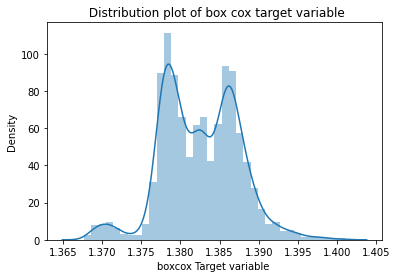

In [ ]:
#Checking boxcox target variable distribution
sns.distplot(y_boxcox)
plt.title(' Distribution plot of box cox target variable')
plt.xlabel('boxcox Target variable ')

# Independent Features

In [ ]:
#Dropping ID feature as it is irrelevant
train.drop(labels='ID',axis=1,inplace=True)

In [ ]:
test_id=test['ID']
test.drop(labels='ID',axis=1,inplace=True)

# categorical variables

In [ ]:
cat_columns=train.select_dtypes(include='object').columns #List to store column names of categorical features
cat_columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

Text(0, 0.5, 'count')

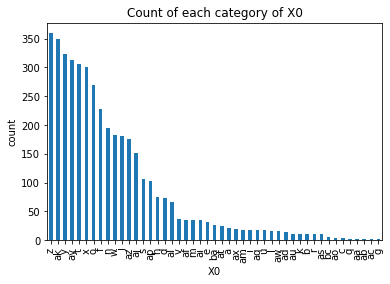

In [ ]:
#Plotting count plot of categories of feature X0
train['X0'].value_counts().plot(kind='bar')
plt.title('Count of each category of X0')
plt.xlabel('X0')
plt.ylabel('count')


It can be seen from above graph that half of the categories of X0 occur very few times

#Plotting of count of categories of categorical features

Text(0, 0.5, 'count')

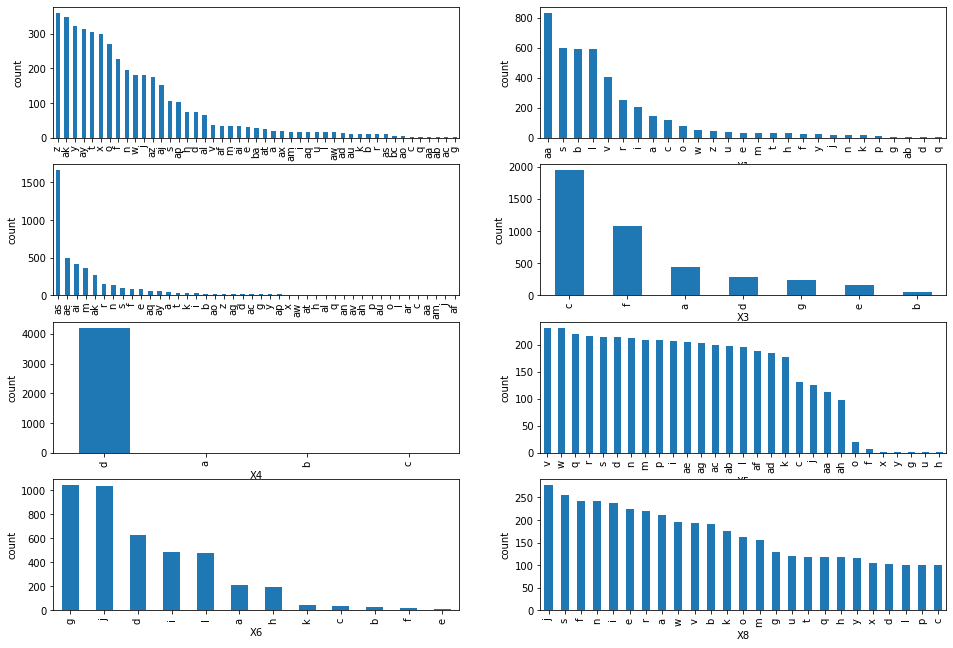

In [ ]:
plt.figure(figsize=(16,14))
plt.figure(1)
#Plotting count plot of categories of feature X0
plt.subplot(521)
train['X0'].value_counts().plot(kind='bar')
plt.xlabel('X0')
plt.ylabel('count')
#Plotting count plot of categories of feature X1
plt.subplot(522)
train['X1'].value_counts().plot(kind='bar')
plt.xlabel('X1')
plt.ylabel('count')
#Plotting count plot of categories of feature X2
plt.subplot(523)
train['X2'].value_counts().plot(kind='bar')
plt.xlabel('X2')
plt.ylabel('count')
#Plotting count plot of categories of feature X3
plt.subplot(524)
train['X3'].value_counts().plot(kind='bar')
plt.xlabel('X3')
plt.ylabel('count')
#Plotting count plot of categories of feature X4
plt.subplot(525)
train['X4'].value_counts().plot(kind='bar')
plt.xlabel('X4')
plt.ylabel('count')
#Plotting count plot of categories of feature X5
plt.subplot(526)
train['X5'].value_counts().plot(kind='bar')
plt.xlabel('X5')
plt.ylabel('count')
#Plotting count plot of categories of feature X6
plt.subplot(527)
train['X6'].value_counts().plot(kind='bar')
plt.xlabel('X6')
plt.ylabel('count')
#Plotting count plot of categories of feature X8
plt.subplot(528)
train['X8'].value_counts().plot(kind='bar')
plt.xlabel('X8')
plt.ylabel('count')

From above we can see that for some features , there are categories which occur very less and for other categories , it is having uniform distribution

 **For X4 feature,it seems there is only category 'd' which is constant, hence it variance will be less and it will not be helpful for predicting. We can drop X4**

# Category of categorical feature vs Time (Dependent variable)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(3.674999999999997, 0.5, 'Time')

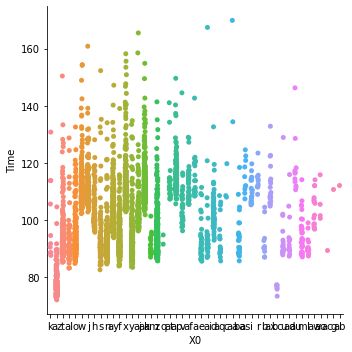

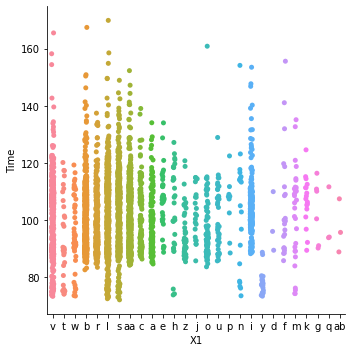

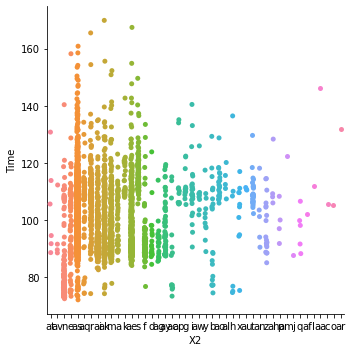

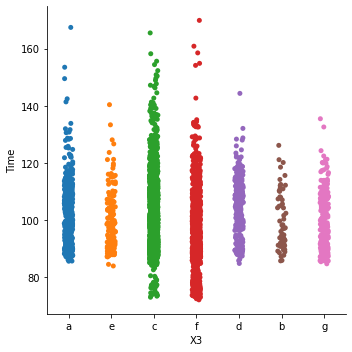

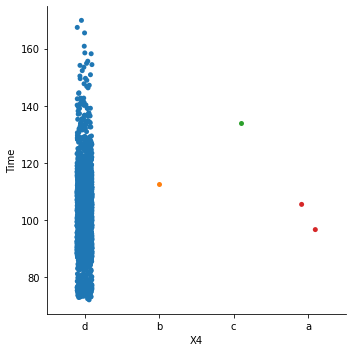

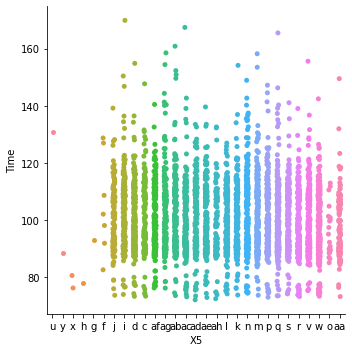

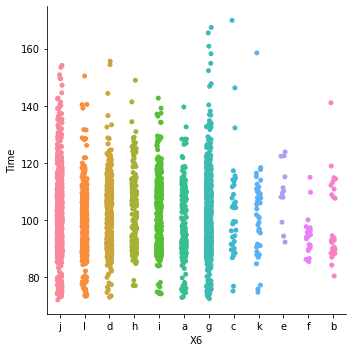

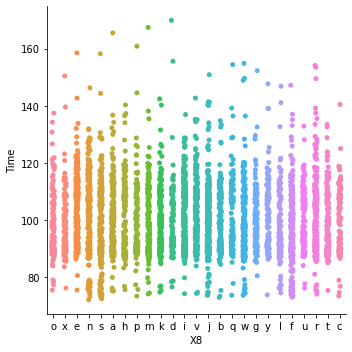

In [ ]:
plt.close()
#Plotting scatter plot between categories of X0 and y
sns.catplot('X0','y',data=train)
plt.xlabel('X0')
plt.ylabel('Time')
#Plotting scatter plot between categories of X1 and y
sns.catplot('X1','y',data=train)
plt.xlabel('X1')
plt.ylabel('Time')
#Plotting scatter plot between categories of X2 and y
sns.catplot('X2','y',data=train)
plt.xlabel('X2')
plt.ylabel('Time')
#Plotting scatter plot between categories of X3 and y
sns.catplot('X3','y',data=train)
plt.xlabel('X3')
plt.ylabel('Time')
#Plotting scatter plot between categories of X4 and y
sns.catplot('X4','y',data=train)
plt.xlabel('X4')
plt.ylabel('Time')
#Plotting scatter plot between categories of X5 and y
sns.catplot('X5','y',data=train)
plt.xlabel('X5')
plt.ylabel('Time')
#Plotting scatter plot between categories of X6 and y
sns.catplot('X6','y',data=train)
plt.xlabel('X6')
plt.ylabel('Time')
#Plotting scatter plot between categories of X8 and y
sns.catplot('X8','y',data=train)
plt.xlabel('X8')
plt.ylabel('Time')


From above figure we can see that all the categories of all the categorical features are uniformly distributed with respect to time except X4 feature.

Because X4 have only dominant category.

# Checking Variance of all the categorical features

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'count')

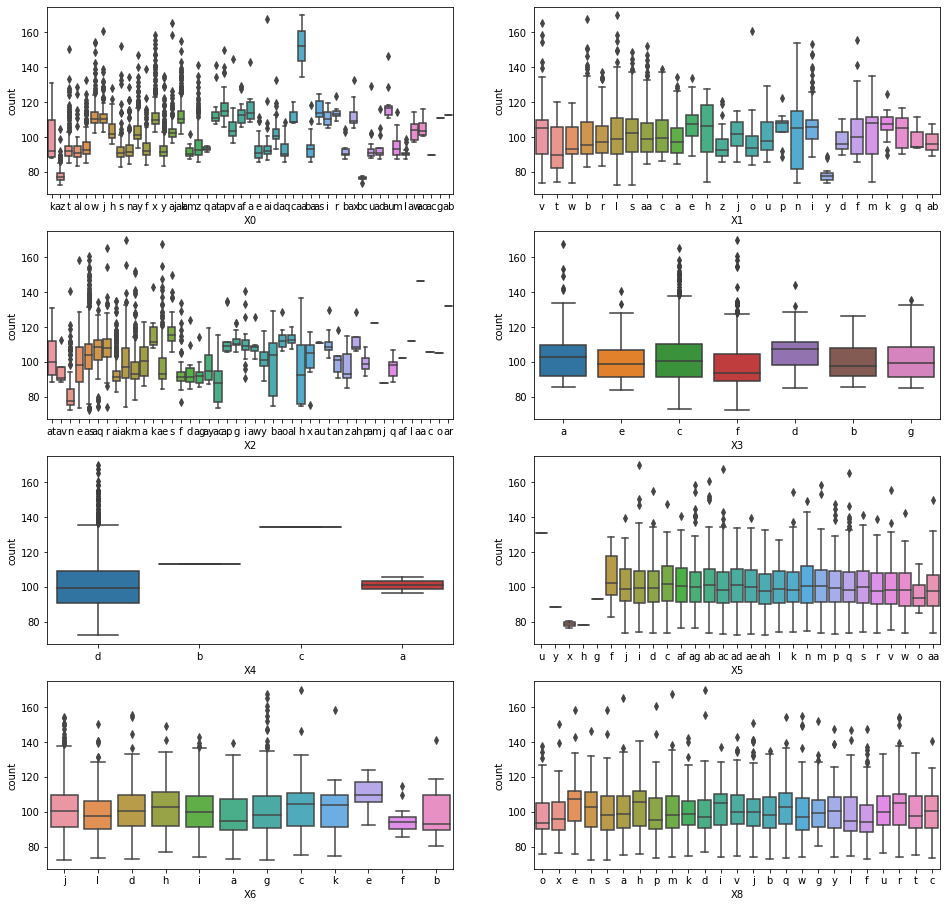

In [ ]:
plt.figure(figsize=(16,20))
plt.figure(1)
#Plotting boxplot of X0
plt.subplot(521)
sns.boxplot(train['X0'],train['y'])
plt.xlabel('X0')
plt.ylabel('count')
#Plotting boxplot of X1
plt.subplot(522)
sns.boxplot(train['X1'],train['y'])
plt.xlabel('X1')
plt.ylabel('count')
#Plotting boxplot of X2
plt.subplot(523)
sns.boxplot(train['X2'],train['y'])
plt.xlabel('X2')
plt.ylabel('count')
#Plotting boxplot of X3
plt.subplot(524)
sns.boxplot(train['X3'],train['y'])
plt.xlabel('X3')
plt.ylabel('count')
#Plotting boxplot of X4
plt.subplot(525)
sns.boxplot(train['X4'],train['y'])
plt.xlabel('X4')
plt.ylabel('count')
#Plotting boxplot of X5
plt.subplot(526)
sns.boxplot(train['X5'],train['y'])
plt.xlabel('X5')
plt.ylabel('count')
#Plotting boxplot of X6
plt.subplot(527)
sns.boxplot(train['X6'],train['y'])
plt.xlabel('X6')
plt.ylabel('count')
#Plotting boxplot of X8
plt.subplot(528)
sns.boxplot(train['X8'],train['y'])
plt.xlabel('X8')
plt.ylabel('count')

From above box plot, we can see that all the categorical features are having good variance except 'X4'.

Hence dropping 'X4' feature

In [ ]:
#Dropping 'X4' from train dataset
train.drop(labels='X4',axis=1,inplace=True)

In [ ]:
test.drop(labels='X4',axis=1,inplace=True)

# Numerical (Binary) Feature

In [ ]:
num_columns=train.select_dtypes(include='int64').columns #List to store column names of binary features
num_columns


Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

# Checking Variance

In [ ]:
num_data=train[num_columns]
variance=num_data.var()
labels=[] #Creating a list "labels" to store feature with zero variance
for i in range(len(variance)):
  if variance[i]==0:
    labels.append(num_columns[i])


In [ ]:
import pickle
import os
file=open('zero_variance','wb')
pickle.dump(labels,file)
file.close()

In [ ]:
#Creating a dictionary to store features as keys and variance value as values
variance_dictionary={'features':variance.keys(),'variance':variance.values} 
variance_df=pd.DataFrame(variance_dictionary,index=variance.keys()) #Creating DataFrame for variance
variance_df

,features,variance
X10,X10,0.013134
X11,X11,0.000000
X12,X12,0.069472
X13,X13,0.054636
X14,X14,0.244908
...,...,...
X380,X380,0.008016
X382,X382,0.007549
X383,X383,0.001661
X384,X384,0.000475


Text(0.5, 0, 'Numerical Features')

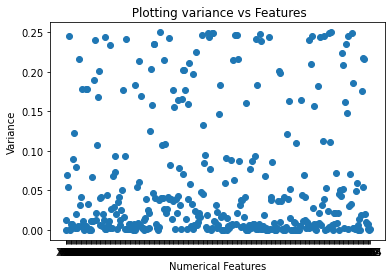

In [ ]:
plt.title(' Plotting variance vs Features')
plt.scatter(variance_df['features'],variance_df['variance'])
plt.ylabel('Variance')
plt.xlabel('Numerical Features')

From above plot, we can see that there are many features which are having zero variance and same variance. We need to drop the features which are having zero variance and same variance.

In [ ]:
print("The features which are having zero variance are")
print(labels)

The features which are having zero variance are
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


There are 12 features which are having zero variance.These variable will not contribute in predictions. 

Hence dropping this 12 Variables


In [ ]:
#Dropping 12 Features with zero variance
train.drop(labels=labels,axis=1,inplace=True)

In [ ]:
train.shape

(4208, 364)

In [ ]:
test.drop(labels=labels,axis=1,inplace=True)

After dropping features with zero variance, we are left with 364 features.

Checking the features which are having same variance

In [ ]:
#Dropping zero variance features from variance_data
variance_df.drop(labels=labels,axis=0,inplace=True)

In [ ]:
variance_df.drop(labels='features',axis=1,inplace=True) #Dropping feature column from variance data
variance_df.duplicated().sum() #Checking the number of features having same variance

55

There are 55 features which are having same variance incuding zero variance. Feature which are having same variance, will not helpful in prediction. Hence we are keeping features with unique variance and dropping features which are having same variance.

In [ ]:
#Checking the features which are having same variance
#In variance data, our indices are features, hence by that reference we are checking features with same variance
same_variance_features=variance_df[variance_df.duplicated()].index #It will return indices(features) which are having same variance
print('Features with same variance is')
same_variance_features

Features with same variance is


Index(['X35', 'X37', 'X39', 'X74', 'X76', 'X84', 'X94', 'X102', 'X113', 'X119',
       'X120', 'X122', 'X130', 'X134', 'X136', 'X146', 'X147', 'X157', 'X158',
       'X172', 'X194', 'X199', 'X205', 'X213', 'X214', 'X216', 'X222', 'X224',
       'X226', 'X227', 'X232', 'X239', 'X242', 'X243', 'X244', 'X245', 'X247',
       'X248', 'X253', 'X254', 'X262', 'X263', 'X266', 'X279', 'X296', 'X299',
       'X302', 'X320', 'X324', 'X326', 'X360', 'X364', 'X365', 'X382', 'X385'],
      dtype='object')

In [ ]:
file=open('same_variance','wb')
pickle.dump(same_variance_features,file)
file.close()

In [ ]:
#Dropping features which are having same variance
train.drop(labels=same_variance_features,axis=1,inplace=True)

In [ ]:
train.shape

(4208, 309)

After removing the features with zero variance,low variance and same variance we are left with 309 features.

We have removed in total 69 features

In [ ]:
test.drop(labels=same_variance_features,axis=1,inplace=True)

In [ ]:
train['y'].to_csv('Target_variable.csv',index=False)

After removing the features with zero variance,low variance,we are left with 364 features.



# Categorical Encoding

In [ ]:
cat_columns=train.select_dtypes(include='object').columns #Storing all the column names which are categorical
cat_columns

Index(['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8'], dtype='object')

In [ ]:
pd.read_csv('whole_training_data.csv').shape

(4208, 548)

We are doing Label encoding for these categorical features instead of One hot encoding because One hot encoding will create more features and our problem statement is to tackle curse of dimensionality

In [ ]:
encoder=OrdinalEncoder() #Ordinal Encoding from scikit learn to encode categories
train[cat_columns]=encoder.fit_transform(train[cat_columns])
test[cat_columns]=encoder.fit_transform(test[cat_columns])

In [ ]:
file=open('Encoder','wb')
pickle.dump(encoder,file)
file.close()

# Splitting train dataset

In [ ]:
X_train=train.drop(labels='y',axis=1) #X is dataframe with input features. So we are removing target variable
y_train=train['y'] #Target variable

In [ ]:
#Splitting training dataset into train and CV dataset,with CV dataset size of 20% of train set. 
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [ ]:
"""After splitting datasets,I have got the dataframe with old indices. 
Old indices will give a problem while concatinating two data frames. 
Hence I have reset the indices.
"""
X_train.reset_index(inplace=True,drop=True)
X_cv.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_cv.reset_index(inplace=True,drop=True)

#Feature Engineering

## PCA


We are taking top 10 components of PCA as features

In [ ]:
pca=PCA(n_components=10)
#Training Pca on all features except categorical features.
train_pca_feat=pca.fit_transform(X_train.drop(labels=cat_columns,axis=1)) # Fit and transform on Training dataset
test_pca_feat=pca.transform(test.drop(labels=cat_columns,axis=1))

In [ ]:
#Creating DataFrame for Pca components with column names, so that we can merge this dataset with original dataset later.
train_pca_df=pd.DataFrame(train_pca_feat,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])
test_pca_df=pd.DataFrame(test_pca_feat,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10'])

# Polynomial Features 

Creating Polynomial Features for top 3 important features. 

Taking only interaction features.

We are creating two way and three way interaction variables from most important binary features.

So to find important binary features, we are modelling our data with Random Forest and finding out important features.

In [ ]:
binary_feat_data=train.drop(labels=cat_columns,axis=1) #Taking only binary features for training of Random Forest model.
regressor=RandomForestRegressor(n_estimators=100,n_jobs=-1) #Taking number of estimators as 100
regressor.fit(binary_feat_data.drop('y',axis=1),train['y'])

RandomForestRegressor(n_jobs=-1)

In [ ]:
binary_features=binary_feat_data.drop('y',axis=1).columns #Storing all the binary features column names in a list

In [ ]:
importance=regressor.feature_importances_ #Storing all feature importance values
#Creating a Dataframe with binary feature and their importance
feat_importance_df=pd.DataFrame(binary_features,importance).reset_index() 
feat_importance_df.columns=['feat_importance','Features']
#Taking top 10 most important features.
top_10_features=feat_importance_df.sort_values(by='feat_importance',ascending=False,ignore_index=True)[:10]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


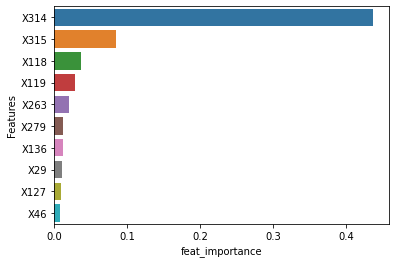

In [ ]:
#Checking top 10 Most important features
sns.barplot(top_10_features['feat_importance'],top_10_features['Features'])

From above we can see that top 3 features are X314,X315 and X118.

Let us create new features from these most important features by two way and three way interaction.

Two way interaction: X314,X315

Three way interaction: X314,X315,X118

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
trans = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False)
polynomial_train=trans.fit_transform(X_train[['X314','X315','X118']])
polynomial_test=trans.transform(test[['X314','X315','X118']])
poly_columns=trans.get_feature_names(X_train[['X314','X315','X118']].columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
polynomial_train_df=pd.DataFrame(polynomial_train,columns=poly_columns)
polynomial_test_df=pd.DataFrame(polynomial_test,columns=poly_columns)
polynomial_train_df.drop(labels=['X314','X315','X118'],axis=1,inplace=True)
polynomial_test_df.drop(labels=['X314','X315','X118'],axis=1,inplace=True)

## All Datasets

We have three datasets

1.Original dataset

2.Original+PCA

3.Original+PCA+feature interaction

Original Data

In [ ]:
print("Shape of Original training Data is",X_train.shape)
print("Shape of Original CV Data is      ",X_cv.shape)
print("Shape of Original test Data is    ",test.shape)


Shape of Original training Data is (3366, 363)
Shape of Original CV Data is       (842, 363)
Shape of Original test Data is     (4209, 363)


In [ ]:
X_train.isnull().sum().sum()

0

In [ ]:
X_train.to_csv('Original_train.csv',index=False)
X_cv.to_csv('Original_cv.csv',index=False)
test.to_csv('Original_test.csv',index=False)

Original+PCA

In [ ]:
#Concatinating Original Data with pca features for train,CV and test dataset
original_pca_train=pd.concat([X_train,train_pca_df],axis=1)
original_pca_cv=pd.concat([X_cv,cv_pca_df],axis=1)
original_pca_test=pd.concat([test,test_pca_df],axis=1)

In [ ]:
print("Shape of Original+PCA training Data is",original_pca_train.shape)
print("Shape of Original+PCA CV Data is      ",original_pca_cv.shape)
print("Shape of Original+PCA test Data is    ",original_pca_test.shape)


Shape of Original+PCA training Data is (3366, 369)
Shape of Original+PCA CV Data is       (842, 369)
Shape of Original+PCA test Data is     (4209, 369)


In [ ]:
original_pca_train.to_csv('original_pca_train.csv',index=False)
original_pca_cv.to_csv('original_pca_cv.csv',index=False)
original_pca_test.to_csv('original_pca_test.csv',index=False)

In [ ]:
whole_train=pd.concat([X_train,train_pca_df,polynomial_train_df],axis=1)
test=pd.concat([test,test_pca_df,polynomial_test_df],axis=1)

In [ ]:
whole_train.to_csv('final_train.csv',index=False)
test.to_csv('final_test.csv',index=False)